# Exploratory data analysis & Data understanding

# Importing dataset

In [14]:
import pandas as pd

data = pd.read_csv("/Users/svr/Desktop/NLP/DATASET/IMDB Dataset.csv", encoding = "ISO-8859-1")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Total column and row

In [3]:
data.shape

(50000, 2)

### Data type and null values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


### Missing data column wise

In [5]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

### Spread of sentiment count

In [6]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

### Spread of sentiment in bar chart

<Axes: xlabel='sentiment'>

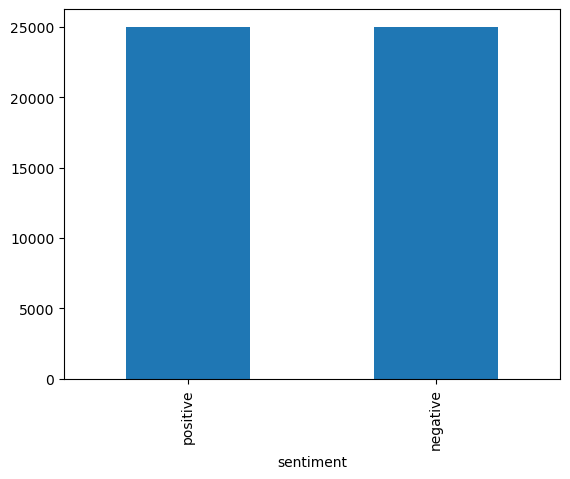

In [7]:
data['sentiment'].value_counts().plot.bar()

# Data Pre Processing

### Convert sentiment to numeric values

In [15]:
# Replace the values in the 'Sentiment' column with numeric ones
data["sentiment"] = data["sentiment"].map({"positive": 1, "negative": 0})

# Display the updated DataFrame
print(data.head())


                                              review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1


In [17]:
# Save to a new CSV file
data.to_csv('/Users/svr/Desktop/NLP/DATASET/IMDB Dataset proccessed.csv', index=False)

print("Okay.csv")

Okay.csv


### Apply Contraction, stopwords, normalization, tokenisation, lemmatisation

In [24]:
text21 = 'some words before the url , this is the url https://abc.com/home.html This is the second part of the text.'
text31 = re.sub(r'https?:\/\/.*[\r\n]*', '', text21)  
print(text31)

some words before the url , this is the url 


In [44]:
import re

text41 = 'this is before link https://www.google.com/maps ... this is after link'

text41 = re.sub(r'https?:\/\/[\S]+', '', text41)

print(text41)


this is before link  ... this is after link


In [21]:
import re
import spacy
import pandas as pd

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Define spaCy's stop words
stop_words = nlp.Defaults.stop_words

# Contractions dictionary
contractions = {
    "can't": "cannot", "won't": "will not", "i'm": "i am", "she's": "she is",
    "he's": "he is", "they're": "they are", "we're": "we are", "i've": "i have",
    "you're": "you are", "they've": "they have", "i'd": "i would", "we'd": "we would",
    "couldn't": "could not", "wouldn't": "would not", "shouldn't": "should not",
    "don't": "do not", "doen't": "does not", "haven't": "have not", "omg": "oh my god",
    "aren't": "are not", "didn't": "did not", "doesn't": "does not", "hadn't": "had not",
    "hasn't": "has not", "isn't": "is not", "it's": "it is", "let's": "let us",
    "ma'am": "madam", "mightn't": "might not", "might've": "might have",
    "mustn't": "must not", "must've": "must have", "needn't": "need not",
    "o'clock": "of the clock", "shan't": "shall not", "she'd": "she would",
    "she'll": "she will", "that's": "that is", "there's": "there is",
    "there'd": "there would", "they'd": "they would", "they'll": "they will",
    "wasn't": "was not", "weren't": "were not", "what'll": "what will",
    "what're": "what are", "what's": "what is", "what've": "what have",
    "where's": "where is", "who'd": "who would", "who'll": "who will",
    "who're": "who are", "who's": "who is", "who've": "who have",
    "why's": "why is", "would've": "would have", "you'd": "you would",
    "you'll": "you will", "you've": "you have", "y'all": "you all"
}

# Emojis dictionary
emojis_dict = {
    ':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
    ':-(': 'sad', ':-<': 'sad', ':-P': 'raspberry', ':O': 'surprised',
    ':-@': 'shocked', ':@': 'shocked', ':-$': 'confused', r':\\': 'annoyed',
    ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
    '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.O': 'confused',
    '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ':-)': 'sadsmile', ';)': 'wink',
    'O:-)': 'angel', 'O*)': 'angel', '(:-D': 'gossip', '=^.^=': 'cat'
}

def preprocess_for_absa(text):
    # 1️⃣ Text Cleaning
    text = re.sub(r'\bRT\b', '', text)                          # Remove "RT" tokens
    #text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)            # Remove hyperlinks
    text = re.sub(r'https?:\/\/[\S]+', '', text)
    text = re.sub(r'[#,.\-$!/()?%_√Ø¬ø¬Ω:&|;]', ' ', text)       # Replace special characters with a space
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)                  # Remove mentions
    text = re.sub(r'\d{1,4}[\/\-]\d{1,2}[\/\-]\d{1,4}', '', text) # Remove dates (e.g. 12/24/03)
    text = re.sub(r'\d+', '', text)                             # Remove standalone numbers

    # 2️⃣ Contraction Expansion
    for contraction, full_form in contractions.items():
        text = re.sub(r'\b' + re.escape(contraction) + r'\b', full_form, text, flags=re.IGNORECASE)
    
    # 3️⃣ Emoji Replacement
    for emoji, meaning in emojis_dict.items():
        text = text.replace(emoji, f' {meaning} ')
    
    # 4️⃣ Normalisation: convert to lowercase and remove extra spaces
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    
    # 5️⃣ Tokenisation, Lemmatisation, and Stopword Removal using spaCy
    doc = nlp(text)
    lemmatized_words = [token.lemma_ for token in doc]
    filtered_words = [word for word in lemmatized_words if word not in stop_words and word.isalpha()]
    
    return " ".join(filtered_words)

# File path and encoding
file_path = "/Users/svr/Desktop/NLP/DATASET/IMDB Dataset proccessed.csv"

# Read the CSV with encoding specified
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Apply preprocessing to the "review" column
data["review"] = data["review"].astype(str).apply(preprocess_for_absa)

# Display the processed dataset
print("\nProcessed ABSA Dataset:")
print(data.head().to_string())

# Save the processed dataset into CSV
data.to_csv('/Users/svr/Desktop/NLP/DATASET/IMDB Dataset proccessed2.csv', index=False)



Processed ABSA Dataset:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  review  sentiment
0  reviewer mention watch o

# Part of Speech (POS) Tagging

In [3]:
import re
import spacy
import pandas as pd
from IPython.display import display  # For displaying DataFrames in a user-friendly way

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Load the processed dataset
file_path = "/Users/svr/Desktop/DSBA/NLP/DATASET/IMDB Dataset proccessed2.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# POS Tagging Function
def pos_tag_tokens(text):
    """
    Takes a string of text and returns a list of (token, POS_tag) tuples.
    """
    # Process text with spaCy
    doc = nlp(text)
    
    # Extract (token, POS) pairs
    pos_tags = [(token.text, token.pos_) for token in doc]
    
    return pos_tags

# Apply POS tagging to the "review" column
data["pos_tags"] = data["review"].astype(str).apply(pos_tag_tokens)

# Display the first few rows with POS tags in a readable format
display(data[["review", "pos_tags"]].head())  # Using IPython.display to show the DataFrame

,review,pos_tags
0,reviewer mention watch oz episode hook right e...,"[(reviewer, PROPN), (mention, NOUN), (watch, N..."
1,wonderful little production br br filming tech...,"[(wonderful, ADJ), (little, ADJ), (production,..."
2,I think wonderful way spend time hot summer we...,"[(I, PRON), (think, VERB), (wonderful, ADJ), (..."
3,basically family little boy jake think zombie ...,"[(basically, ADV), (family, NOUN), (little, AD..."
4,petter mattei love time money visually stunnin...,"[(petter, NOUN), (mattei, NOUN), (love, NOUN),..."


# General word cloud in the dataset

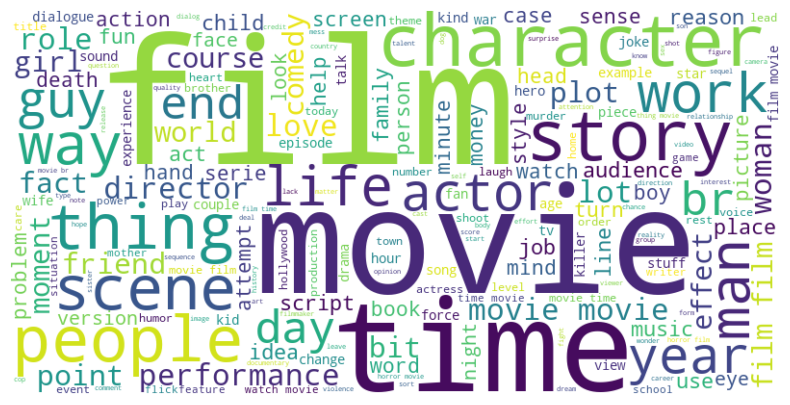

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract nouns from POS-tagged data
noun_words = []
for pos_tags in data["pos_tags"]:
    noun_words.extend([word for word, pos in pos_tags if pos in ["NOUN"]])

# Combine all selected words
noun_text = " ".join(noun_words)

# Generate word cloud for nouns
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(noun_text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Positive word cloud in the dataset

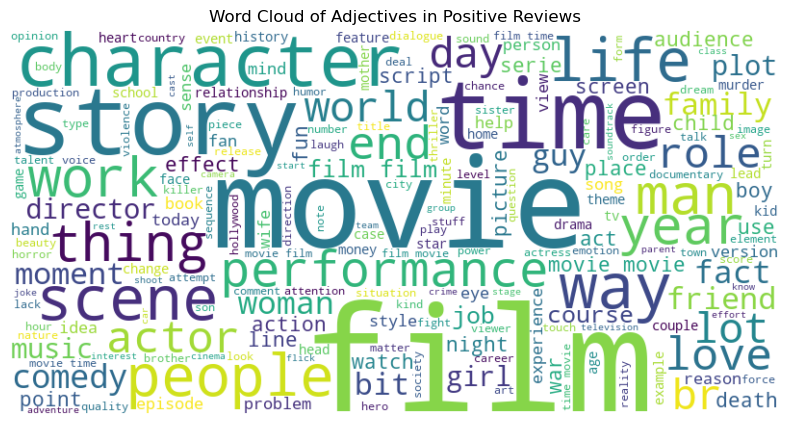

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine adjectives into a single string
adjective_text = " ".join(positive_adjective_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap="viridis").generate(adjective_text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Adjectives in Positive Reviews")
plt.show()


Total adjectives in negative reviews: 1112039
Sample adjectives from negative reviews: ['family', 'boy', 'parent', 'fight', 'time', 'movie', 'soap', 'opera', 'rambo', 'zombie']


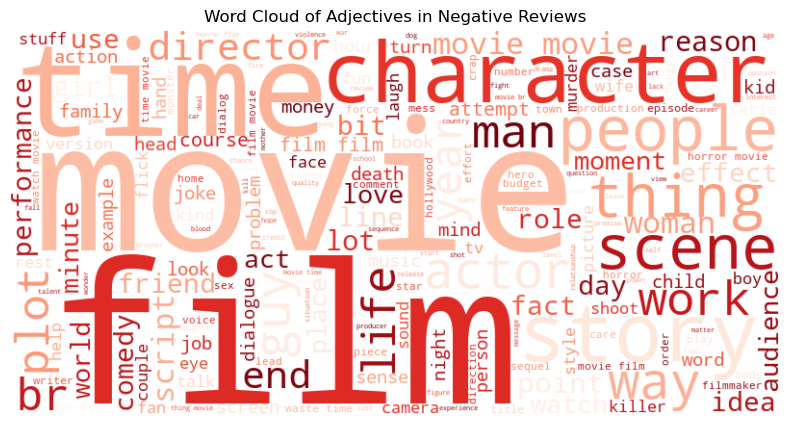

In [18]:
# Extract adjectives from negative reviews
negative_adjective_words = []

for pos_tags in data[data["sentiment"] == 0]["pos_tags"]:  # Use 0 for negative reviews
    if isinstance(pos_tags, list):
        negative_adjective_words.extend([word for word, pos in pos_tags if pos == "NOUN"])

print(f"Total adjectives in negative reviews: {len(negative_adjective_words)}")
print(f"Sample adjectives from negative reviews: {negative_adjective_words[:10]}")

# Generate word cloud for negative adjectives
if negative_adjective_words:
    negative_adjective_text = " ".join(negative_adjective_words)

    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap="Reds").generate(negative_adjective_text)

    # Display word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud of Adjectives in Negative Reviews")
    plt.show()
else:
    print("⚠️ No adjectives found in negative reviews. Check POS tagging or data format.")


# Split

In [5]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data["review"]  # Use processed text column
y = data["sentiment"]  # Target labels (0 or 1)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0, stratify=y  # Added stratify=y for balanced classes
)

print("✅ Data Split Done..")


✅ Data Split Done..


In [6]:
# Remove NaN values from X_train
X_train = X_train.dropna()


# TF-IDF Vectorization (Feature Extraction)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=20000)

# Fit TF-IDF on cleaned training data
vectoriser.fit(X_train)

print('Vectoriser fitted.')
print('No. of feature words:', len(vectoriser.get_feature_names_out()))


Vectoriser fitted.
No. of feature words: 20000


In [35]:
# Apply transformation to convert text to TF-IDF vectors
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)

print('Data Transformed.')


AttributeError: 'csr_matrix' object has no attribute 'lower'

In [11]:
# Fix label size mismatch
y_train = y_train[:X_train.shape[0]]

# Verify sizes again
print(f"Fixed X_train size: {X_train.shape[0]}")
print(f"Fixed y_train size: {y_train.shape[0]}")


Fixed X_train size: 47499
Fixed y_train size: 47499


# Multinomial Naive Bayes

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Initialize and train the Naïve Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted for class imbalance
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1-score: {f1:.4f}")

# Print full classification report
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\n🔹 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.8664
✅ Precision: 0.8666
✅ Recall: 0.8664
✅ F1-score: 0.8664

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1250
           1       0.86      0.88      0.87      1250

    accuracy                           0.87      2500
   macro avg       0.87      0.87      0.87      2500
weighted avg       0.87      0.87      0.87      2500


🔹 Confusion Matrix:
[[1068  182]
 [ 152 1098]]


# Multinomial NB Hyperparameter Tuning

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END .........................................alpha=0.01; total time=   0.2s
[CV] END .........................................alpha=0.01; total time=   0.2s
[CV] END .........................................alpha=0.01; total time=   0.2s
[CV] END .........................................alpha=0.01; total time=   0.2s
[CV] END .........................................alpha=0.01; total time=   0.1s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.2s
[CV] END .........................................alpha=0.01; total time=   0.2s
[CV] END .........................................alpha=0.01; total time=   0.1s
[CV] END .........................................alpha=0.01; total time=   0.1s
[CV] END .........................................alpha=0.05; total time=   0.1s
[CV] END .....................................

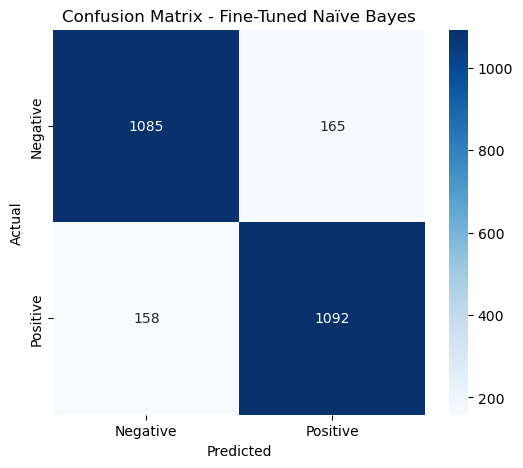

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Define a wider range of alpha values
param_grid = {
    'alpha': [0.01, 0.05, 0.1, 0.3, 0.5, 1.0, 1.5, 2.0, 5.0, 10.0]  # More fine-grained values
}

# Initialize Naïve Bayes classifier
nb_classifier = MultinomialNB()

# Use GridSearchCV with 10-fold cross-validation for better tuning # justify why cv=10
grid_search = GridSearchCV(nb_classifier, param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Get the best parameter
best_params = grid_search.best_params_
print(f"✅ Best Parameters: {best_params}")

# Train Naïve Bayes using the best-found parameter
best_nb_classifier = MultinomialNB(alpha=best_params['alpha'])
best_nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = best_nb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print(f"\n✅ Fine-Tuned Naïve Bayes Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Print classification report
print("\n🔹 Classification Report (Fine-Tuned Model):")
print(classification_report(y_test, y_pred))

# Generate and visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Fine-Tuned Naïve Bayes")
plt.show()


In [18]:
# Get the best parameter found by GridSearchCV
best_params = grid_search.best_params_
print(f"✅ Best Parameter for Naïve Bayes: {best_params}")


✅ Best Parameter for Naïve Bayes: {'alpha': 5.0}



✅ Final Tuned Naïve Bayes Metrics:
Accuracy: 0.8708
Precision: 0.8708
Recall: 0.8708
F1-score: 0.8708

🔹 Classification Report (Final Tuned Model):
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1250
           1       0.87      0.87      0.87      1250

    accuracy                           0.87      2500
   macro avg       0.87      0.87      0.87      2500
weighted avg       0.87      0.87      0.87      2500



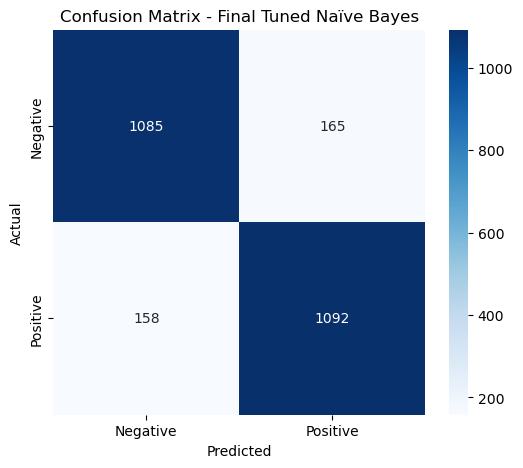

In [19]:
# Train Naïve Bayes with the best alpha value
best_nb_classifier = MultinomialNB(alpha=5.0)
best_nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = best_nb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print(f"\n✅ Final Tuned Naïve Bayes Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Print classification report
print("\n🔹 Classification Report (Final Tuned Model):")
print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Final Tuned Naïve Bayes")
plt.show()


# ROC Curve

# Support Vector Machine (SVM)

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Initialize the SVM classifier (Linear Kernel works best for text data)
svm_classifier = SVC(kernel='linear', C=1.0)  # C is the regularization parameter

# Train the SVM model on TF-IDF transformed data
svm_classifier.fit(X_train, y_train)

# Make predictions on test data
y_pred_svm = svm_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Print results
print(f"✅ SVM Accuracy: {accuracy_svm:.4f}")
print(f"✅ SVM Precision: {precision_svm:.4f}")
print(f"✅ SVM Recall: {recall_svm:.4f}")
print(f"✅ SVM F1-score: {f1_svm:.4f}")

# Print full classification report
print("\n🔹 Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

# Print confusion matrix
print("\n🔹 Confusion Matrix (SVM):")
print(confusion_matrix(y_test, y_pred_svm))


✅ SVM Accuracy: 0.8904
✅ SVM Precision: 0.8906
✅ SVM Recall: 0.8904
✅ SVM F1-score: 0.8904

🔹 Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1250
           1       0.88      0.90      0.89      1250

    accuracy                           0.89      2500
   macro avg       0.89      0.89      0.89      2500
weighted avg       0.89      0.89      0.89      2500


🔹 Confusion Matrix (SVM):
[[1099  151]
 [ 123 1127]]


# SVM Hyperparameter Tuning

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END ...............................C=0.1, kernel=linear; total time=17.0min
[CV] END .................................C=1, kernel=linear; total time=18.9min
[CV] END ...............................C=0.1, kernel=linear; total time=19.2min
[CV] END ...............................C=0.1, kernel=linear; total time=19.2min
[CV] END .................................C=1, kernel=linear; total time=23.0min
[CV] END .................................C=1, kernel=linear; total time=25.4min
[CV] END ................................C=10, kernel=linear; total time=33.2min
[CV] END ................................C=10, kernel=linear; total time=86.6min
[CV] END ................................C=10, kernel=linear; total time=89.0min
✅ Best Parameters for SVM: {'C': 1, 'kernel': 'linear'}

✅ Tuned SVM Metrics:
Accuracy: 0.8904
Precision: 0.8906
Recall: 0.8904
F1-score: 0.8904

🔹 Classification Report (Tuned SVM):
              precision    re

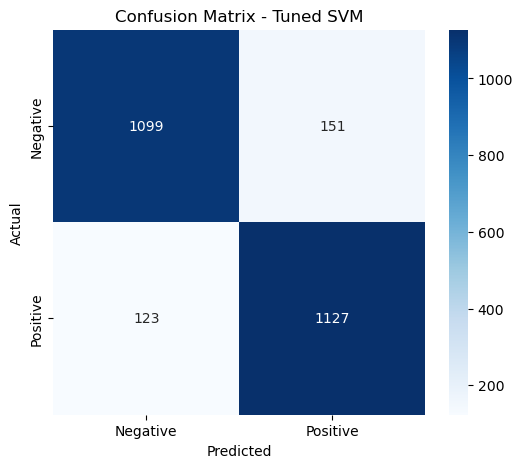

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define a reduced hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Fewer values for faster tuning
    'kernel': ['linear']  # Only using linear kernel for text data # selecting linear for speed performance
}

# Initialize SVM model
svm_classifier = SVC()

# Use GridSearchCV with 3-fold cross-validation for faster tuning
grid_search = GridSearchCV(svm_classifier, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"✅ Best Parameters for SVM: {best_params}")

# Train the final SVM model with best parameters
best_svm_classifier = SVC(C=best_params['C'], kernel=best_params['kernel'])
best_svm_classifier.fit(X_train, y_train)

# Make predictions on test data
y_pred_svm = best_svm_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Print results
print(f"\n✅ Tuned SVM Metrics:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-score: {f1_svm:.4f}")

# Print full classification report
print("\n🔹 Classification Report (Tuned SVM):")
print(classification_report(y_test, y_pred_svm))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned SVM")
plt.show()


# ROC Curve

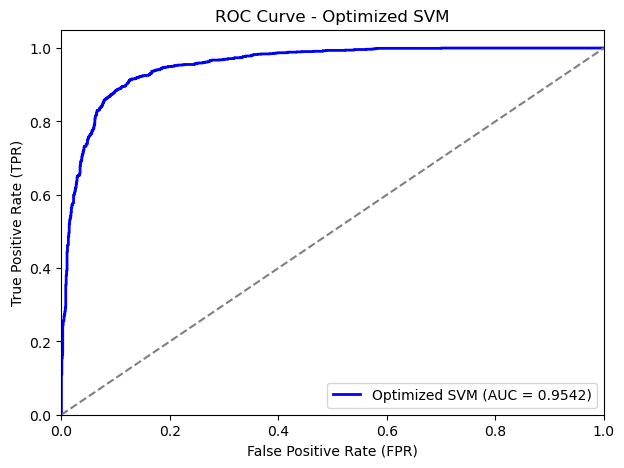

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Train the best SVM model with probability estimation enabled
best_svm_classifier = SVC(C=best_params['C'], kernel=best_params['kernel'], probability=True)
best_svm_classifier.fit(X_train, y_train)

# Get predicted probabilities
y_prob_svm = best_svm_classifier.predict_proba(X_test)[:, 1]  # Probability of positive class

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Optimized SVM (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Optimized SVM')
plt.legend(loc="lower right")
plt.show()


# XGBoost

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:18:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



✅ Base XGBoost Metrics:
Accuracy: 0.8556
Precision: 0.8566
Recall: 0.8556
F1-score: 0.8555

🔹 Classification Report (Base XGBoost):
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1250
           1       0.84      0.88      0.86      1250

    accuracy                           0.86      2500
   macro avg       0.86      0.86      0.86      2500
weighted avg       0.86      0.86      0.86      2500



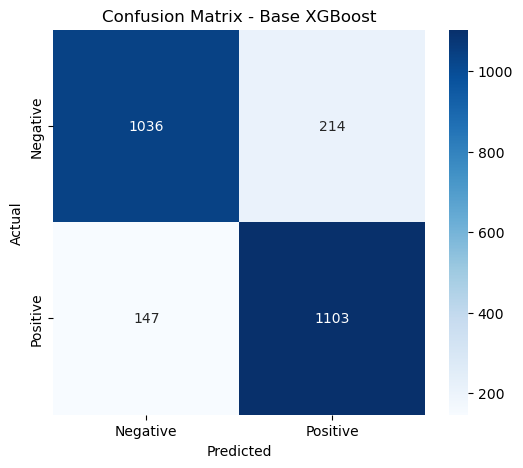

In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize base XGBoost model with default parameters
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=1)

# Train XGBoost model on TF-IDF transformed training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on test data
y_pred_xgb = xgb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

# Print results
print(f"\n✅ Base XGBoost Metrics:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-score: {f1_xgb:.4f}")

# Print full classification report
print("\n🔹 Classification Report (Base XGBoost):")
print(classification_report(y_test, y_pred_xgb))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Base XGBoost")
plt.show()


# XG Boost Hyper Parameter Tuning

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:29:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:29:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:29:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:29:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.7; total time=11.2min
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.7; total time=11.2min
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.7; total time=11.2min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:41:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:41:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:41:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=1.0; total time=46.6min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:16:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=1.0; total time=46.7min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:16:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=1.0; total time=43.3min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:24:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.8; total time=44.6min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:25:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.8; total time=45.0min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:26:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.8; total time=22.9min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:39:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=31.6min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:48:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=24.6min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:50:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=34.8min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:59:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=36.5min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:02:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=26.3min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:05:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=26.2min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:14:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.7; total time=115.5min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:25:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.7; total time=116.6min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:26:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.7; total time=117.1min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:27:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.7; total time=24.4min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:30:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time= 7.9min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:34:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time= 7.9min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:35:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time= 7.6min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:37:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.7; total time=23.9min
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time= 4.2min
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time= 4.1min
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time= 3.0min
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.7; total time=17.0min
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=1.0; total time=52.2min
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=1.0; total time=45.0min
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=1.0; total time=42.6min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.8}


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:47:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



✅ Tuned XGBoost Metrics:
Accuracy: 0.8792
Precision: 0.8796
Recall: 0.8792
F1-score: 0.8792

🔹 Classification Report (Tuned XGBoost):
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1250
           1       0.87      0.89      0.88      1250

    accuracy                           0.88      2500
   macro avg       0.88      0.88      0.88      2500
weighted avg       0.88      0.88      0.88      2500



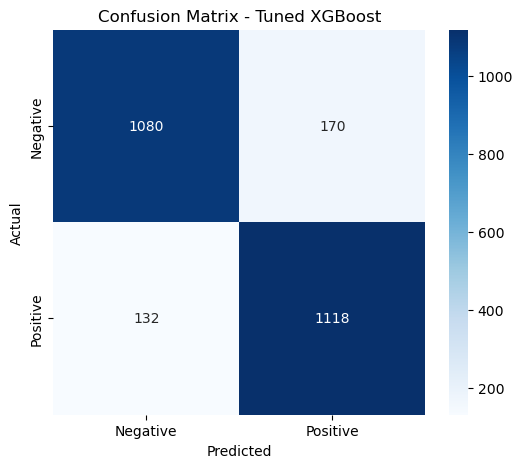

In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define hyperparameter search space (smaller for faster tuning)
param_dist = {
    'n_estimators': [100, 300, 500],  # Number of trees
    'max_depth': [3, 5, 7],  # Depth of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size
    'subsample': [0.7, 0.8, 1.0],  # Sample ratio per boosting round
    'colsample_bytree': [0.7, 0.8, 1.0]  # Feature selection per tree
}

# Initialize XGBoost model
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=1)

# Use RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(
    xgb_classifier, param_distributions=param_dist, 
    n_iter=10,  # Only test 10 random combinations
    cv=3,  # 3-fold cross-validation
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=2, 
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get best parameters
best_params = random_search.best_params_
print(f"✅ Best Parameters for XGBoost: {best_params}")

# Train final XGBoost model with best parameters
best_xgb_classifier = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
best_xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_xgb = best_xgb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

# Print results
print(f"\n✅ Tuned XGBoost Metrics:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-score: {f1_xgb:.4f}")

# Print classification report
print("\n🔹 Classification Report (Tuned XGBoost):")
print(classification_report(y_test, y_pred_xgb))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned XGBoost")
plt.show()


# ROC Curve

Training Base XGBoost model...


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:52:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


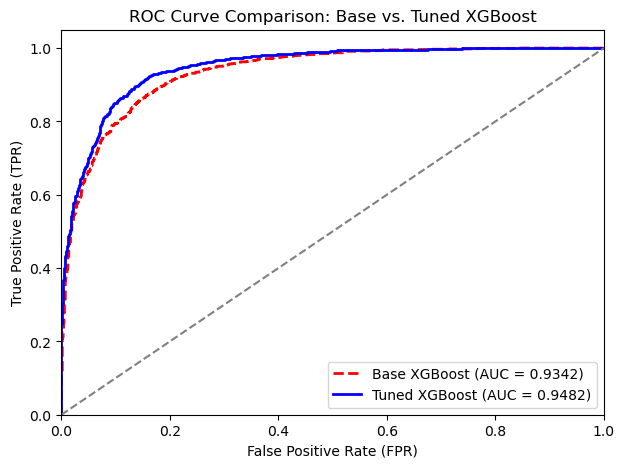

In [31]:
# Ensure both models are trained before predicting
if not hasattr(xgb_classifier, "classes_"):  
    print("Training Base XGBoost model...")
    xgb_classifier.fit(X_train, y_train)

if not hasattr(best_xgb_classifier, "classes_"):  
    print("Training Tuned XGBoost model...")
    best_xgb_classifier.fit(X_train, y_train)

# Get predicted probabilities for Base XGBoost model
y_prob_xgb_base = xgb_classifier.predict_proba(X_test)[:, 1]  # Base model probability

# Get predicted probabilities for Tuned XGBoost model
y_prob_xgb_tuned = best_xgb_classifier.predict_proba(X_test)[:, 1]  # Tuned model probability

# Compute ROC curve and AUC score for Base XGBoost
fpr_base, tpr_base, _ = roc_curve(y_test, y_prob_xgb_base)
roc_auc_base = auc(fpr_base, tpr_base)

# Compute ROC curve and AUC score for Tuned XGBoost
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_xgb_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

# Plot ROC Curves
plt.figure(figsize=(7, 5))
plt.plot(fpr_base, tpr_base, color='red', lw=2, linestyle="--", label=f'Base XGBoost (AUC = {roc_auc_base:.4f})')
plt.plot(fpr_tuned, tpr_tuned, color='blue', lw=2, label=f'Tuned XGBoost (AUC = {roc_auc_tuned:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing

# Labels and legend
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Comparison: Base vs. Tuned XGBoost')
plt.legend(loc="lower right")
plt.show()


# Comparison table

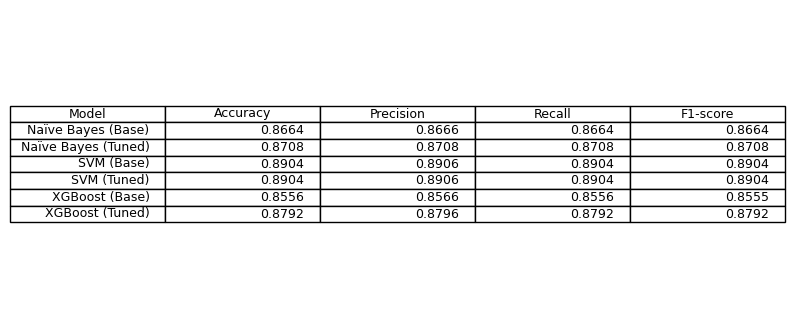

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a comparison table for the models
comparison_data = {
    "Model": ["Naïve Bayes (Base)", "Naïve Bayes (Tuned)", "SVM (Base)", "SVM (Tuned)", "XGBoost (Base)", "XGBoost (Tuned)"],
    "Accuracy": [0.8664, 0.8708, 0.8904, 0.8904, 0.8556, 0.8792],
    "Precision": [0.8666, 0.8708, 0.8906, 0.8906, 0.8566, 0.8796],
    "Recall": [0.8664, 0.8708, 0.8904, 0.8904, 0.8556, 0.8792],
    "F1-score": [0.8664, 0.8708, 0.8904, 0.8904, 0.8555, 0.8792]
}

# Creating DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Displaying the comparison table as a matplotlib table
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust the figure size as needed
ax.axis('tight')
ax.axis('off')
ax.table(cellText=comparison_df.values, colLabels=comparison_df.columns, loc='center')

plt.show()

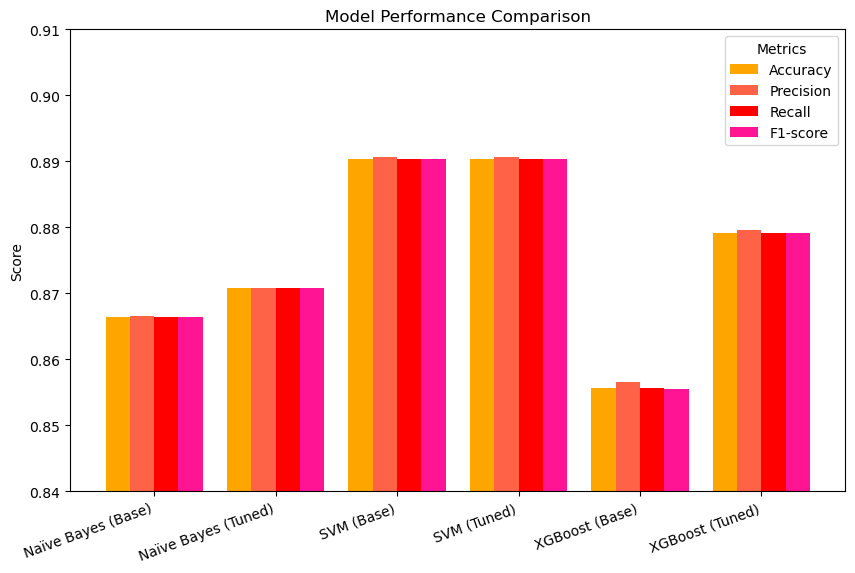

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define model names
models = [
    "Naïve Bayes (Base)", "Naïve Bayes (Tuned)", 
    "SVM (Base)", "SVM (Tuned)", 
    "XGBoost (Base)", "XGBoost (Tuned)"
]

# Define performance metrics (from your table)
accuracy = [0.8664, 0.8708, 0.8904, 0.8904, 0.8556, 0.8792]
precision = [0.8666, 0.8708, 0.8906, 0.8906, 0.8566, 0.8796]
recall = [0.8664, 0.8708, 0.8904, 0.8904, 0.8556, 0.8792]
f1_score = [0.8664, 0.8708, 0.8904, 0.8904, 0.8555, 0.8792]

# Convert to DataFrame for easier plotting
df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1_score
})

# Set bar width and positions
bar_width = 0.2
x = np.arange(len(models))

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - 1.5 * bar_width, df["Accuracy"], bar_width, label="Accuracy", color="orange")
ax.bar(x - 0.5 * bar_width, df["Precision"], bar_width, label="Precision", color="tomato")
ax.bar(x + 0.5 * bar_width, df["Recall"], bar_width, label="Recall", color="red")
ax.bar(x + 1.5 * bar_width, df["F1-score"], bar_width, label="F1-score", color="deeppink")

# Adjust y-axis range to zoom in on small differences
ax.set_ylim(0.84, 0.91)  # Set y-axis to focus on performance differences

# Customize plot
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=20, ha="right")
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison")
ax.legend(title="Metrics")

# Show plot
plt.show()
